In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
img = cv2.imread('einstein3.jpg', cv2.IMREAD_GRAYSCALE)
print('Shape:', img.shape)

Shape: (450, 449)


In [10]:
# SVD on image
def compress_svd(img, singular_value_ratio=0.3):            # Since, we need to use 30% eigenvalues
    u, singular_values, vt = np.linalg.svd(img)
    min_component = min(img.shape[0], img.shape[1])
    sig = np.zeros((u.shape[0], vt.shape[0]), dtype=float)
    sig[:min_component, :min_component] = np.diag(singular_values)

    #print(np.allclose(img, np.dot(u, np.dot(sig, vt))))
    n_components = int(img.shape[1]*singular_value_ratio)          
    print('Shape of U={}, sigma={} and V_T={}'.format(u[:, :n_components].shape, sig[:n_components, :n_components].shape, vt[:n_components, :].shape))
    svd_reconstructed_img = u[:, :n_components] @ sig[:n_components, :n_components] @ vt[:n_components, :]
    return svd_reconstructed_img

In [11]:
# Try using PCA
from sklearn.decomposition import PCA
def compress_pca(img, component_ratio=0.3):
    pca_obj = PCA(n_components=int(img.shape[1]*component_ratio))
    img_reduced = pca_obj.fit_transform(img)
    pca_reconstructed_img = pca_obj.inverse_transform(img_reduced)
    return pca_reconstructed_img

Shape of U=(450, 134), sigma=(134, 134) and V_T=(134, 449)
Shape of U=(450, 22), sigma=(22, 22) and V_T=(22, 449)


Text(0.5, 0, 'PCA (5% components)')

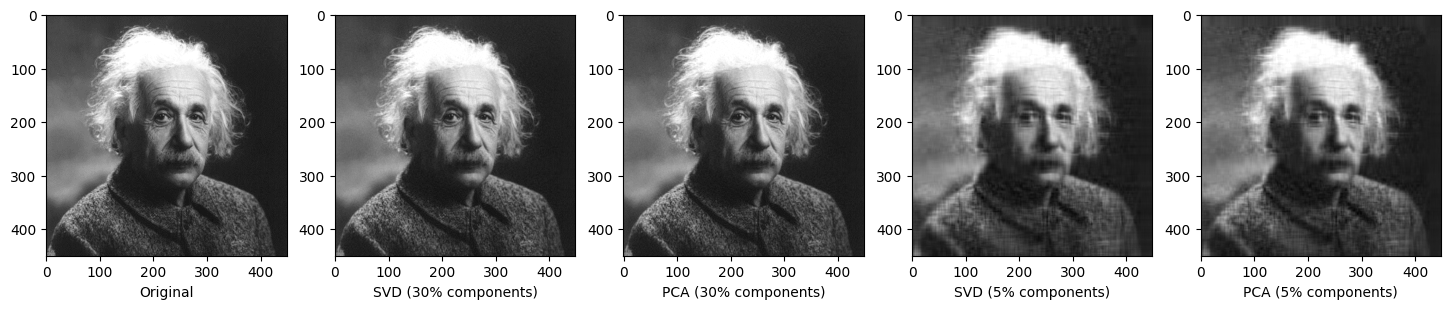

In [12]:
fig, axes = plt.subplots(1,5, figsize=(18,9))
axes[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[0].set_xlabel('Original')
axes[1].imshow(compress_svd(img, 0.3), cmap='gray', vmin=0, vmax=255)
axes[1].set_xlabel('SVD (30% components)')
axes[2].imshow(compress_pca(img, 0.3), cmap='gray', vmin=0, vmax=255)
axes[2].set_xlabel('PCA (30% components)')
axes[3].imshow(compress_svd(img, 0.05), cmap='gray', vmin=0, vmax=255)
axes[3].set_xlabel('SVD (5% components)')
axes[4].imshow(compress_pca(img, 0.05), cmap='gray', vmin=0, vmax=255)
axes[4].set_xlabel('PCA (5% components)')

In [13]:
def projected_gradient_descent(x, P, q, r, alpha=0.05):
    for _ in range(100):
        x -= alpha*(P@x + q)
        
        for i in range(len(x)):
            if x[i] < -1:
                x[i]=-1
            elif x[i]>1:
                x[i]=1
    
    print ('X for min value:', x)
    print('Min function Value:', x.T@P@x + q.T@x + r)

P = np.array([
    [13,12,-2],
    [12,17,6],
    [-2,6,12]])
q = np.array([[-22],[-14.5],[13]])
r = 1
x = np.random.random(3).reshape(3,1)

projected_gradient_descent(x, P, q, r)

X for min value: [[ 1. ]
 [ 0.5]
 [-1. ]]
Min function Value: [[-2.]]
